# 编程环境

使用的编程环境是：python3+opencv3

python3可以直接安装anaconda，安装后在命令行处执行`conda install -c https://conda.binstar.org/menpo opencv3`安装opencv3即可配置完所有开发环境

# 算法步骤

1. 将彩色图片转化为灰度图片
2. 中值滤波去除背景噪点
3. canny算子进行边缘检测
4. hough变换检测圆
5. 可视化检测结果与输出

# 使用说明

1. 核心函数是`getCircle`，该函数输入一个变量即可，输入变量是图像文件的位置，输出的是圆心的坐标。同时该函数还进行了图像处理的可视化。
2. 不同的图像需要有不同的预处理参数，尤其在更换背景的情况下。
3. 保守情况下，该算法适用于该场景以及类似大小的圆形物体识别，其他场景需要测试。
4. 检测的图像最好是接近圆形，这就需要拍照的时候最好从图像正上方拍而不要斜着拍，否则会产生一定的误差。

# 核心代码

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def getCircle(file):
    img = plt.imread(file) #读入数据
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#灰度图像 
    blur = cv2.medianBlur(gray,25) #中值滤波

    #canny算子边缘检测
    edges = cv2.Canny(blur,50,100)

    #hough检测圆
    circles1 = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,1,100,param1=100,param2=30,minRadius=300,maxRadius=470)

    #hough transform
    circles = circles1[0,:,:]#提取为二维
    circles = np.uint16(np.around(circles))#四舍五入，取整
    print ('检测出来%d个圆' % (len(circles1)))
    print ('圆心的位置是',circles[0,:2])
    for i in circles[:]: 
        cv2.circle(img,(i[0],i[1]),i[2],(255,0,0),thickness=40,lineType=4)#画圆
        cv2.circle(img,(i[0],i[1]),2,(255,0,0),thickness=20,lineType=4)#画圆心
    f, (ax1, ax2,ax3,ax4) = plt.subplots(4, 1,figsize=(20,20))
    ax1.imshow(gray,'gray'),plt.setp(ax1, xticks=[], yticks=[])
    ax2.imshow(blur,'gray'),plt.setp(ax2, xticks=[], yticks=[])
    ax3.imshow(edges,'gray'),plt.setp(ax3, xticks=[], yticks=[])
    ax4.imshow(img),plt.setp(ax4, xticks=[], yticks=[])
    return circles[0,:2]

def get2Circles(file1,file2):
    img1 = plt.imread(file1) #读入数据
    gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)#灰度图像 
    blur1 = cv2.medianBlur(gray1,25) #中值滤波
    #canny算子边缘检测
    edges1 = cv2.Canny(blur1,50,100)
    #hough检测圆
    circles1 = cv2.HoughCircles(edges1,cv2.HOUGH_GRADIENT,1,100,param1=100,param2=30,minRadius=300,maxRadius=470)
    #hough transform
    circles = circles1[0,:,:]#提取为二维
    circles = np.uint16(np.around(circles))#四舍五入，取整
    center1 = circles[0,:2]
    #print ('检测出来%d个圆' % (len(circles1)))
    print ('第一个圆心的位置是',center1)
    for i in circles[:]: 
        cv2.circle(img1,(i[0],i[1]),i[2],(255,0,0),thickness=40,lineType=4)#画圆
        cv2.circle(img1,(i[0],i[1]),2,(255,0,0),thickness=20,lineType=4)#画圆心
    
    #file2    
    img2 = plt.imread(file2) #读入数据
    gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)#灰度图像 
    blur2 = cv2.medianBlur(gray2,25) #中值滤波
    #canny算子边缘检测
    edges2 = cv2.Canny(blur2,50,100)
    #hough检测圆
    circles1 = cv2.HoughCircles(edges2,cv2.HOUGH_GRADIENT,1,100,param1=100,param2=30,minRadius=300,maxRadius=470)
    #hough transform
    circles = circles1[0,:,:]#提取为二维
    circles = np.uint16(np.around(circles))#四舍五入，取整
    center2 = circles[0,:2]
    #print ('检测出来%d个圆' % (len(circles1)))
    print ('第二个圆心的位置是',center2)
    for i in circles[:]: 
        cv2.circle(img1,(i[0],i[1]),i[2],(255,0,0),thickness=40,lineType=4)#画圆
        cv2.circle(img1,(i[0],i[1]),2,(255,0,0),thickness=20,lineType=4)#画圆心
       
    print('圆心的位置从',center1,'移动到了',center2)
    print('圆心向右移动的像素是',(center1.astype(np.float16)-center2.astype(np.float16))[0])
    print('圆心向上移动的像素是',(center1.astype(np.float16)-center2.astype(np.float16))[1])

    # plot
    f, (ax1, ax2,ax3,ax4) = plt.subplots(4, 1,figsize=(20,20))
    ax1.imshow(gray1,'gray'),plt.setp(ax1, xticks=[], yticks=[])
    ax2.imshow(blur1,'gray'),plt.setp(ax2, xticks=[], yticks=[])
    ax3.imshow(edges1,'gray'),plt.setp(ax3, xticks=[], yticks=[])
    ax4.imshow(img1),plt.setp(ax4, xticks=[], yticks=[])
    


# 示例

## 两张图片

第一个圆心的位置是 [2238 1548]
第二个圆心的位置是 [2224 1526]
圆心的位置从 [2238 1548] 移动到了 [2224 1526]
圆心向右移动的像素是 14.0
圆心向上移动的像素是 22.0


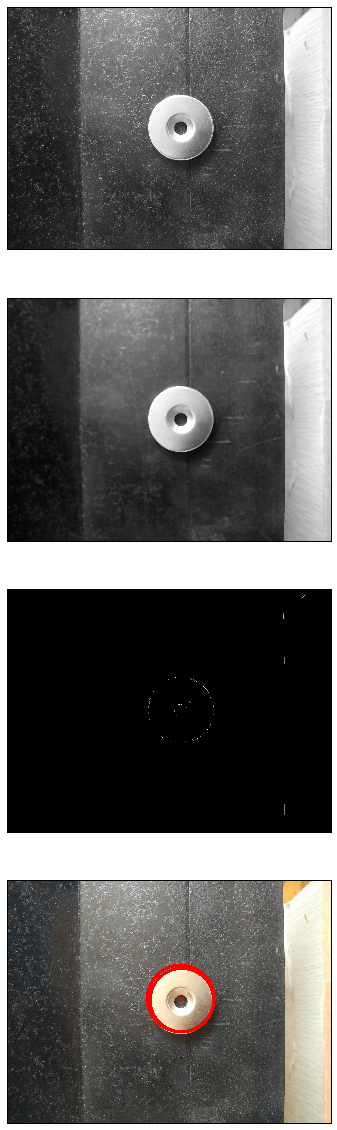

In [29]:
get2Circles('0530_5.jpg','0530_6.jpg')

第一个圆心的位置是 [ 942 1476]
第二个圆心的位置是 [ 940 1442]
圆心的位置从 [ 942 1476] 移动到了 [ 940 1442]
圆心向右移动的像素是 2.0
圆心向上移动的像素是 34.0


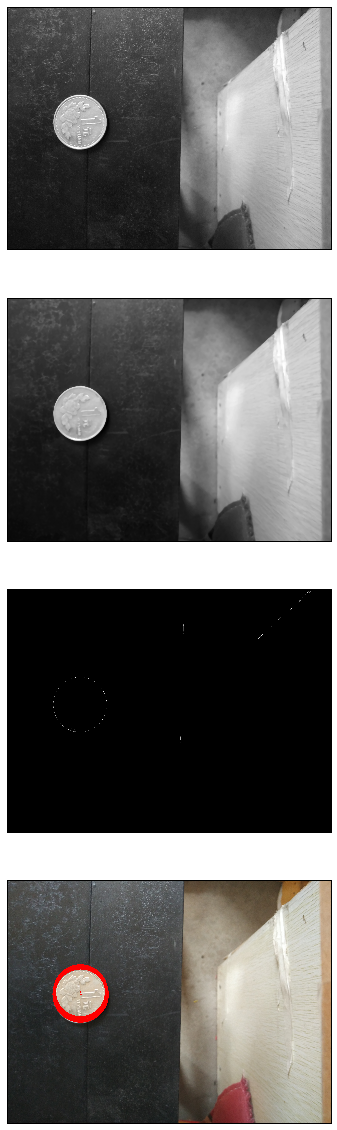

In [30]:
get2Circles('0530_7.jpg','0530_8.jpg')

## 单个图片

检测出来1个圆
圆心的位置是 [2238 1548]


array([2238, 1548], dtype=uint16)

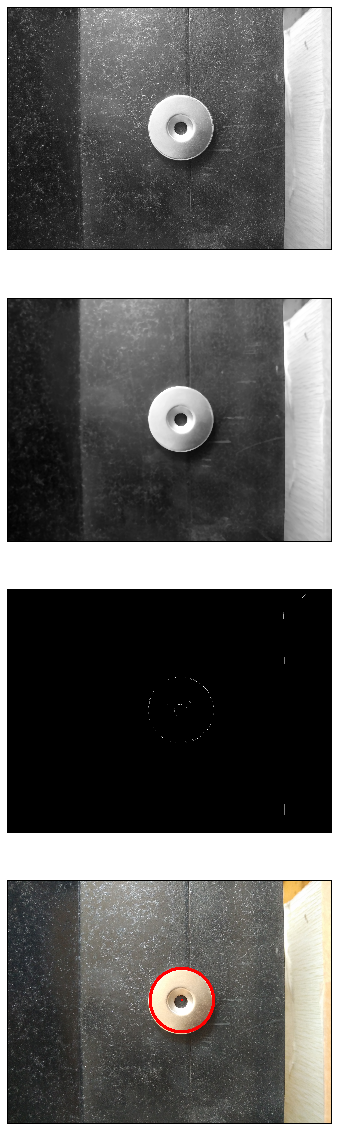

In [31]:
getCircle('0530_5.jpg')

检测出来1个圆
圆心的位置是 [2224 1526]


array([2224, 1526], dtype=uint16)

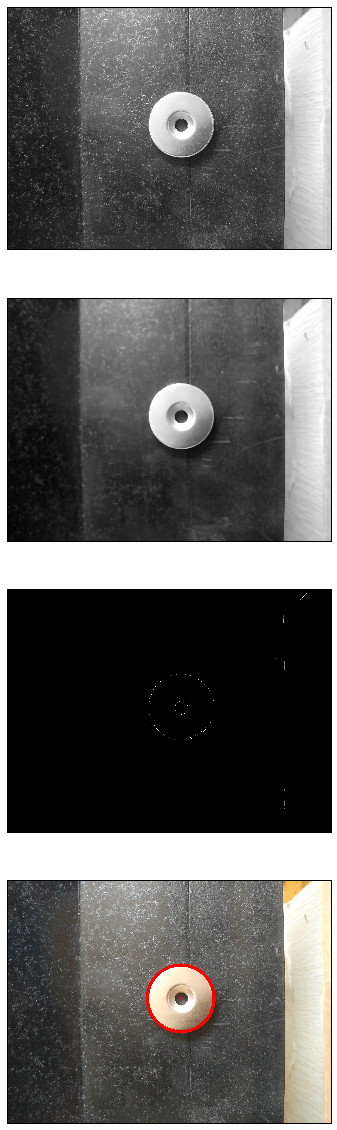

In [53]:
getCircle('0530_6.jpg')

检测出来1个圆
圆心的位置是 [ 942 1476]


array([ 942, 1476], dtype=uint16)

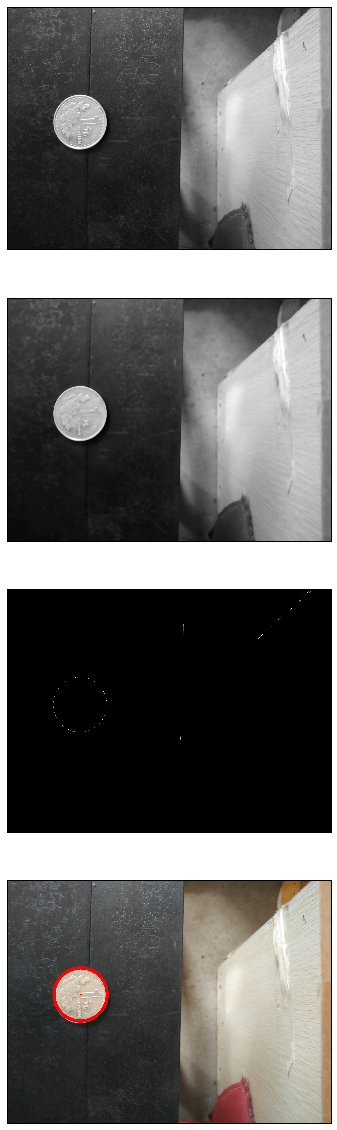

In [54]:
getCircle('0530_7.jpg')

检测出来1个圆
圆心的位置是 [ 940 1442]


array([ 940, 1442], dtype=uint16)

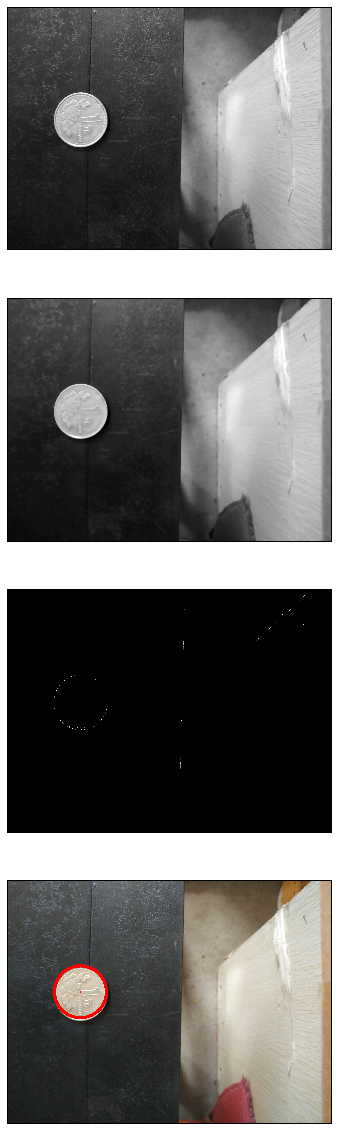

In [55]:
getCircle('0530_8.jpg')